<a href="https://colab.research.google.com/github/Shraddha6211/Machine-Learning-Extra-Class/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.DataFrame({
    "Study_Hours": [5, 15, 8, 20, 12, 3, 18, 7, 10, 14],
    "Attendance": [60, 90, 75, 95, 85, 50, 92, 70, 80, 88],
    "Practice_Test_Score": [55, 85, 65, 90, 78, 40, 88, 60, 72, 80],
    "Pass_Exam": [0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
})

In [ ]:
X = data[["Study_Hours", "Attendance", "Practice_Test_Score"]]
y = data["Pass_Exam"]

In [ ]:
# ---- Step 3: Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# ---- Step 4: Train Random Forest ----
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# ---- Step 5: Predict on Test Data ----
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ---- Step 6: Predict for a New Student ----
# Example: 11 study hours, 82% attendance, 75 practice score
new_student = [[11, 82, 75]]

prediction = model.predict(new_student)

if prediction[0] == 1:
    print("\nPrediction: The student is likely to PASS ✅")
else:
    print("\nPrediction: The student is likely to FAIL ❌")


Prediction: The student is likely to PASS ✅


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Feature Importance
# How often and how usefully a feature was used across trees
for name, importance in zip(X.columns, rf.feature_importances_):
  print(name, round(importance, 2))

Study_Hours 0.35
Attendance 0.36
Practice_Test_Score 0.28


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

data = pd.DataFrame({
    "Study_Hours": [5, 15, 8, 20, 12, 3, 18, 7, 10, 14],
    "Attendance": [60, 90, 75, 95, 85, 50, 92, 70, 80, 88],
    "Practice_Test_Score": [55, 85, 65, 90, 78, 40, 88, 60, 72, 80],
    "Pass_Exam": [0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
})

X = data[["Study_Hours", "Attendance", "Practice_Test_Score"]]
y = data["Pass_Exam"]

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X, y)

RandomForestClassifier(n_estimators=10, random_state=42)

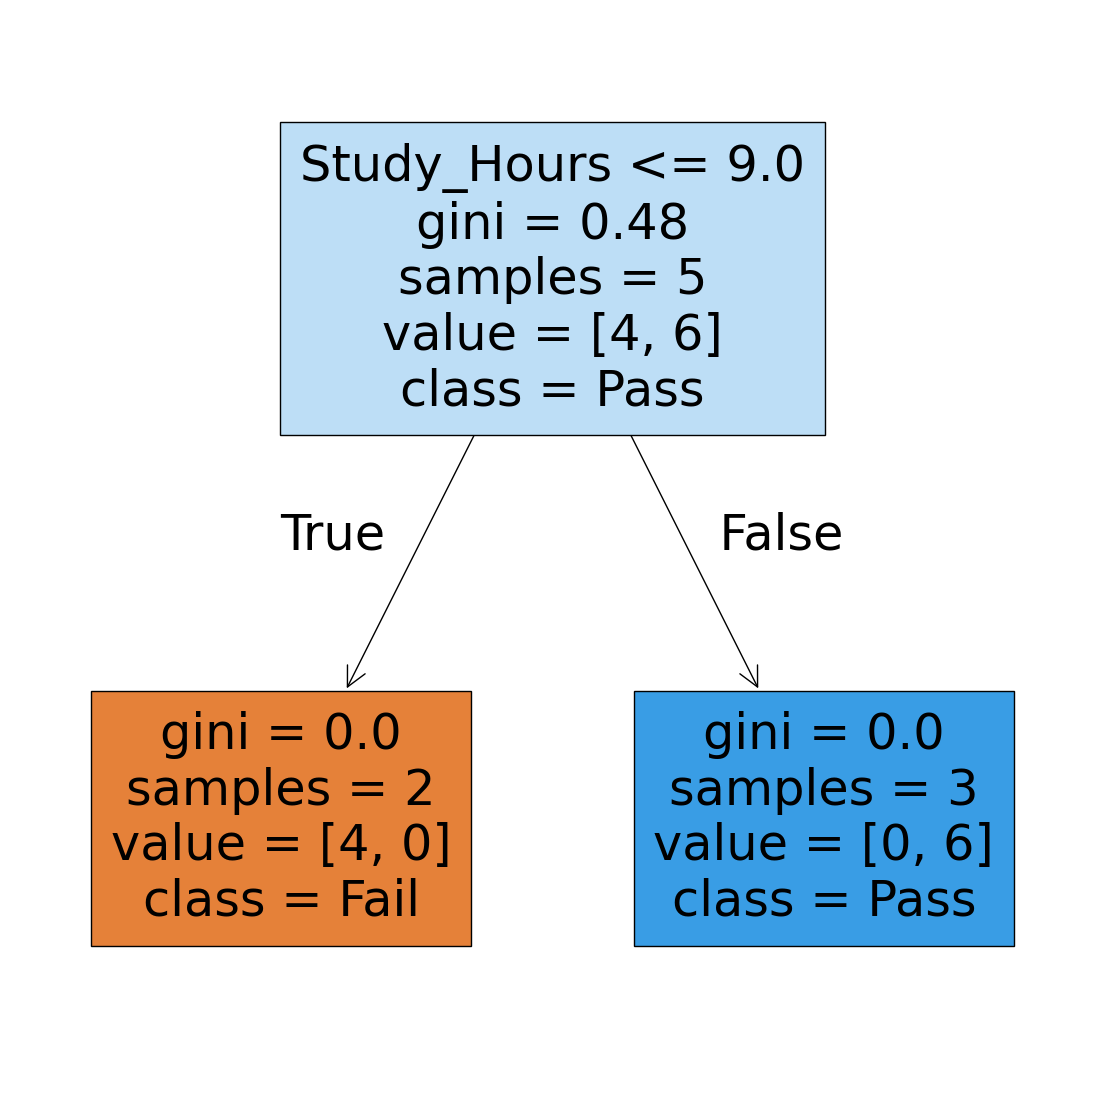

In [ ]:
# One tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick the first tree
tree = rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(14, 14))
plot_tree(
    tree,
    filled=True,
    feature_names=X.columns,
    class_names=["Fail", "Pass"]
    )
plt.show()


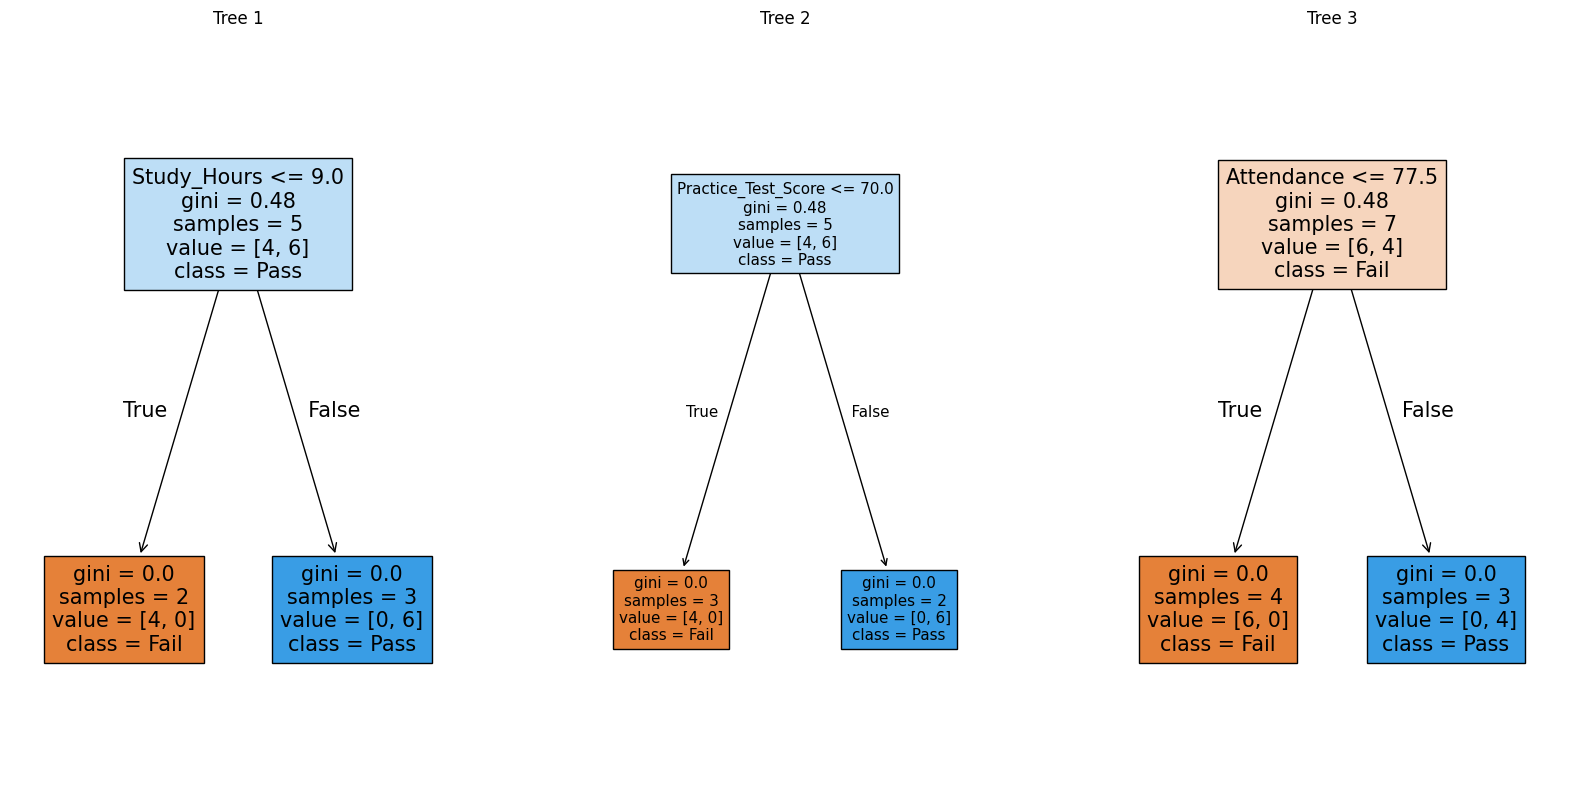

In [ ]:
# Multiple Trees
plt.figure(figsize =(20,10))
for i in range(3):
  plt.subplot(1,3,i+1)
  plot_tree(
      rf.estimators_[i],
      filled=True,
      feature_names=X.columns,
      class_names=["Fail", "Pass"]
  )
  plt.title(f"Tree {i+1}")
plt.show()

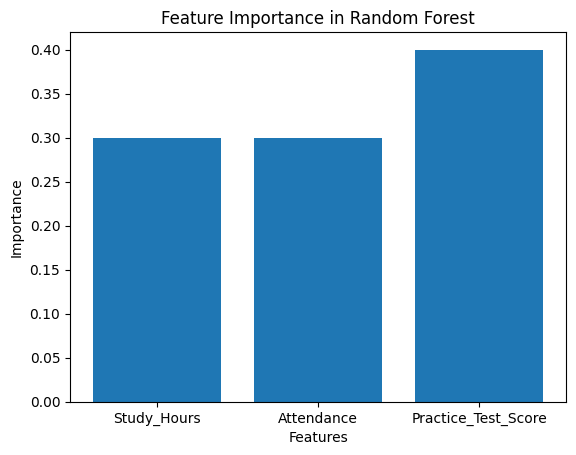

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt
importances = rf.feature_importances_

plt.bar(X.columns, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

In [ ]:
# How trees vote
import numpy as np

new_student = pd.DataFrame({
    "Study_Hours": [11],
    "Attendance": [82],
    "Practice_Test_Score": [75]
})
votes = []

for i, tree in enumerate(rf.estimators_):
  vote = tree.predict(new_student)[0]
  votes.append(vote)
  print(f"Tree {i+1}", "Pass" if vote ==1 else "Fail")

print("\nFinal Prediction ", "Pass" if np.mean(votes) > 0.5 else "Fail")

Tree 1 Pass
Tree 2 Pass
Tree 3 Pass
Tree 4 Pass
Tree 5 Pass
Tree 6 Pass
Tree 7 Fail
Tree 8 Pass
Tree 9 Pass
Tree 10 Pass

Final Prediction  Pass


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U